In [54]:
"""
Classification of thyroid 
using scikit learn
"""

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

def extract_data(path):
    data_frame = pd.read_csv(path, sep="\t")
    return data_frame

def create_features_target(data_frame):
    target = data_frame[["target"]]
    features = data_frame.drop("target", axis=1)
    return features, target

d_frame = extract_data("data/allbp.tsv")
print(d_frame.shape)
data_features, data_target = create_features_target(d_frame)
data_features = data_features
print(data_features.shape)
print(data_target.shape)

# More information about dataset: https://archive.ics.uci.edu/ml/datasets/Thyroid+Disease
# Link to dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/
# Description: https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allbp.names
    

(3772, 30)
(3772, 29)
(3772, 1)


In [55]:
from sklearn.model_selection import train_test_split

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
data_features_train, data_features_test, data_target_train, data_target_test = train_test_split(data_features, 
                                                                                                data_target, test_size=0.33, random_state=42)

print(data_features_train.shape)
print(data_target_train.shape)
print(data_features_test.shape)
print(data_target_test.shape)


(2527, 29)
(2527, 1)
(1245, 29)
(1245, 1)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

# Logistic regression: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
trained_model = LogisticRegression().fit(data_features_train, data_target_train)
prediction = trained_model.predict(data_features_test)
proba_prediction = trained_model.decision_function(data_features_test)
feature_coefficient = trained_model.coef_
print(feature_coefficient)

data_target_test_binary = label_binarize(data_target_test, classes=[0, 1, 2])
n_classes = data_target_test_binary.shape[1]

[[-4.43027243e-02 -8.38047633e-01 -2.74207754e-01 -1.99262392e-02
  -1.17705958e-03 -5.09546321e-02 -6.63271505e-04 -7.69904450e-03
  -3.28120430e-03 -8.14301358e-02 -7.73898516e-02 -3.93210070e-03
  -7.56048020e-02 -2.58850658e-02 -1.63868676e-06  2.10427294e-01
   1.85165071e-01  5.56622898e-03 -1.71534787e-01 -3.13166565e-02
  -9.21693336e-03  2.42667143e-02 -1.04226790e-02 -2.64804084e-01
  -1.04226854e-02  1.36134206e-02  0.00000000e+00  0.00000000e+00
  -2.56622979e-01]
 [-2.21066259e-02 -8.89884460e-01 -8.98974574e-01 -4.01560793e-01
   1.42299679e-01 -4.32560096e-01  8.46904587e-01 -2.77121580e-02
   6.28370253e-01 -6.00089659e-01  1.94650283e-01 -2.22166302e-01
   3.35983494e-01 -7.46944867e-01 -1.31527664e-02 -1.03362699e+00
  -1.64608556e+00 -8.89678983e-03  1.61823716e-01  1.39915518e-02
  -2.52628934e-01 -7.04823127e-03  2.01698766e+00  5.67666947e-02
   1.83608284e+00 -2.38102833e-04  0.00000000e+00  0.00000000e+00
  -1.69606517e-01]
 [ 1.96933816e-02  7.83410960e-01  8.8

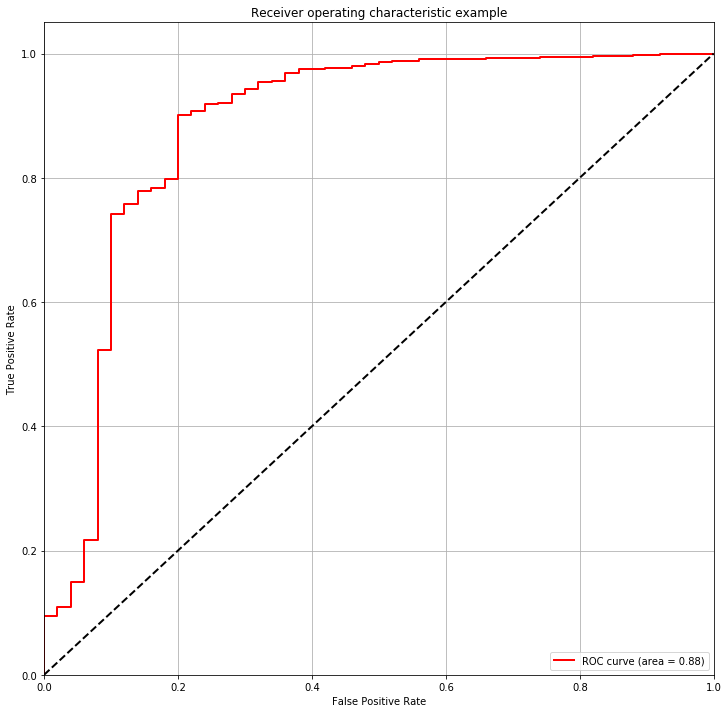

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics
# plot area under curve
def auc_plot(binarized_labels, probabilistic_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(binarized_labels[:, i], probabilistic_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(binarized_labels.ravel(), probabilistic_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(12,12))
    lw = 2
    plt.plot(fpr[2], tpr[2], color='red', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

auc_plot(data_target_test_binary, proba_prediction)

In [77]:
# Running a classifier on default parameters
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
trained_model = model.fit(data_features_train, data_target_train)
prediction = trained_model.predict(data_features_test)
print("Feature weights:")
print(trained_model.feature_importances_)
prob_pred_rf = model.predict_proba(data_features_test)

Feature weights:
[1.02614864e-01 1.91277764e-02 8.31936915e-03 1.33349084e-05
 8.58646637e-04 1.63626762e-03 6.40529182e-02 3.52931701e-03
 5.28238730e-04 6.10264263e-03 1.02167685e-02 8.06623436e-05
 4.92578371e-03 2.13143309e-02 0.00000000e+00 5.59465014e-03
 8.71808549e-03 8.07621675e-02 1.43495304e-02 1.74488423e-01
 1.93676149e-03 9.36988712e-02 2.16138706e-02 2.53425562e-01
 2.54593173e-03 5.27336588e-02 0.00000000e+00 0.00000000e+00
 4.68115667e-02]


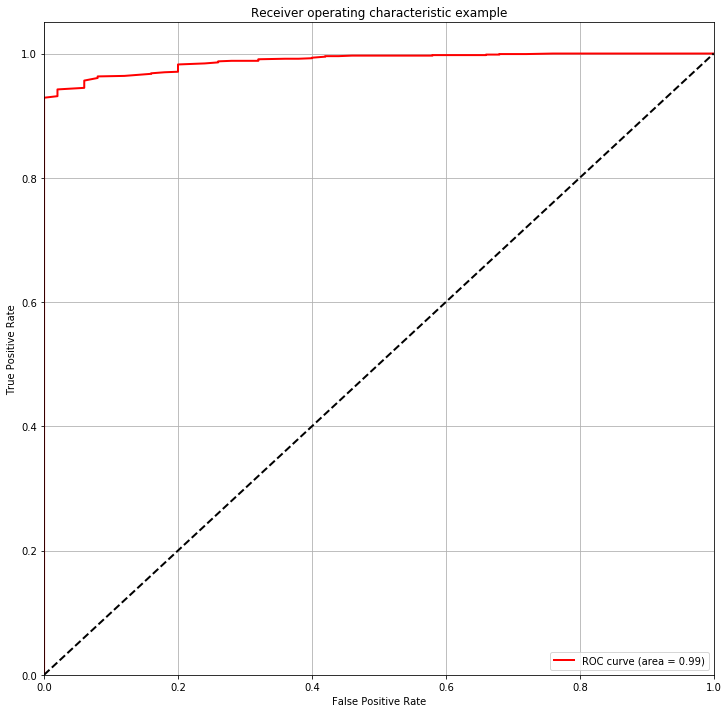

In [59]:
auc_plot(data_target_test_binary, prob_pred_rf)

In [86]:
# Hyperparameter optimisation
# https://github.com/hyperopt/hyperopt/wiki/FMin

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# configuration evaluation
def rf_model(params):    
    model = RandomForestClassifier(**params)
    trained_model = model.fit(data_features_train, data_target_train)
    prediction = trained_model.predict(data_features_test)
    l_data_target_test = data_target_test['target'].values.tolist()
    accuracy = len([x for x, y in zip(l_data_target_test, prediction) if x == y]) / float(len(prediction))
    return {'loss': -accuracy, 'status': STATUS_OK}

# max number of configuration evaluation
n_max_evaluation = 500

# evaluation trials
trials = Trials()

# configuration search space
search_space = {
    'n_estimators': hp.choice('n_estimators', range(1,50)),
    'max_depth': hp.choice('max_depth', range(10,20))
}

# minimize the error/ maximize the accuracy
best_params = fmin(rf_model, search_space, algo=tpe.suggest, max_evals=n_max_evaluation, trials=trials)
print("Best params: %s" % best_params)

100%|██████████| 500/500 [00:35<00:00, 11.62it/s, best loss: -0.9823293172690764]
Best params: {'max_depth': 9, 'n_estimators': 10}


In [113]:
from sklearn.neighbors import KNeighborsClassifier


# configuration evaluation
def svc_model(params):    
    model = KNeighborsClassifier(**params)
    trained_model = model.fit(data_features_train, data_target_train)
    prediction = trained_model.predict(data_features_test)
    l_data_target_test = data_target_test['target'].values.tolist()
    accuracy = len([x for x, y in zip(l_data_target_test, prediction) if x == y]) / float(len(prediction))
    return {'loss': -accuracy, 'status': STATUS_OK}

# max number of configuration evaluation
n_max_evaluation = 50

trials = Trials()

# configuration search space
search_space = {
    'n_neighbors': hp.choice('n_neighbors', range(1, 30))
}

# minimize the error/ maximize the accuracy
best_params = fmin(svc_model, search_space, algo=tpe.suggest, max_evals=n_max_evaluation, trials=trials)
print("Best params: %s" % best_params)


100%|██████████| 50/50 [00:01<00:00, 30.66it/s, best loss: -0.9654618473895582]
Best params: {'n_neighbors': 17}


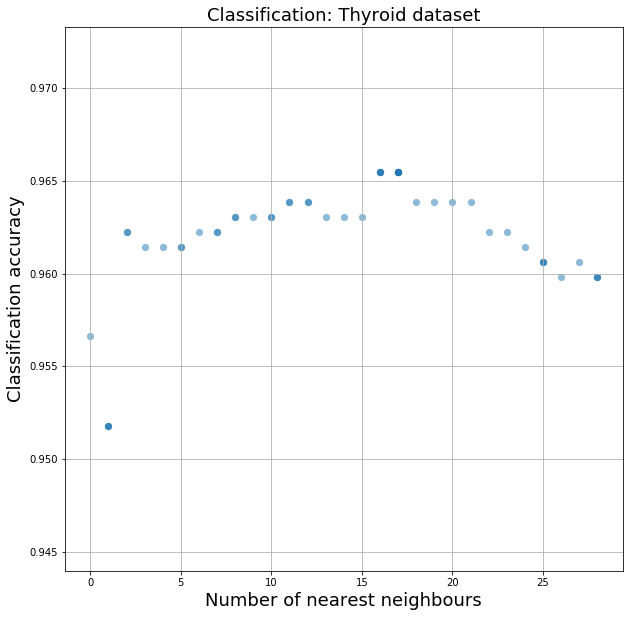

In [124]:
# Plot
plt.figure(figsize=(10,10))
#f, ax = plt.subplots(1)
xs = [t['misc']['vals']['n_neighbors'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
plt.scatter(xs, ys, s=50, linewidth=0.1, alpha=0.5)
plt.title('Classification: Thyroid dataset', fontsize=18)
plt.xlabel('Number of nearest neighbours', fontsize=18)
plt.ylabel('Classification accuracy', fontsize=18)
plt.grid(True)
plt.show()